### This project is made by :- 
Roll no. :- 18BCE088, 18BCE102, 18BCE093                   
Division :- B - (2019-2020) - 2nd year CSE Students

## Part - 1 Exploring Data

### Importing modules
Libraries used are :-
numpy, pandas, scikit-learn,seaborn, altair, tensorflow, zipfile etc

In [77]:
import numpy as np
import pandas as pd
import altair as alt
import seaborn as sns

##### We will be using MovieLens Dataset For Prediction
Original Dataset contains 10M ratings from 270k users. 
We have subset of that dataset as movielens.zip containing 100,000 ratings from users

In [78]:
#Downloading dataset if not available
from urllib.request import urlretrieve
import zipfile
import os
if not os.path.isfile('movielens.zip'):
    print("downloading dataset.....")
    urlretrieve("http://files.grouplens.org/datasets/movielens/ml-100k.zip", "movielens.zip")
    zip_ref = zipfile.ZipFile('movielens.zip', "r")
    zip_ref.extractall()
    print("dataset download completed .")
else:
    print("Required files are already present.")

Required files are already present.


In [79]:
#importinng user information from user dataset
users_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv(
    'ml-100k/u.user', sep='|', names=users_cols, encoding='ISO-8859-1')
users.head(10)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [80]:
#importing rating dataset as pandas dataframe
ratings_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(
    'ml-100k/u.data', sep='\t', names=ratings_cols, encoding='latin-1')
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [81]:
#importing movies dataset with genre information
genre_cols = [
    "genre_unknown", "Action", "Adventure", "Animation", "Children", "Comedy",
    "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror",
    "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"
]
movies_cols = [
    'movie_id', 'title', 'release_date', "video_release_date", "imdb_url"
] + genre_cols
movies = pd.read_csv(
    'ml-100k/u.item', sep='|', names=movies_cols, encoding='latin-1')
movies = movies.drop(columns = 'imdb_url')
movies.head()

,movie_id,title,release_date,video_release_date,genre_unknown,Action,Adventure,Animation,Children,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [82]:
# take a look at how movie dataset look likes
movies.describe()

,movie_id,video_release_date,genre_unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1682.000000,0.0,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,...,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,841.500000,NaN,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,...,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,485.695893,NaN,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,...,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.250000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.750000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
# checking for patterns and validation on data distribution of ratings
ratings.describe()

,user_id,movie_id,rating,unix_timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


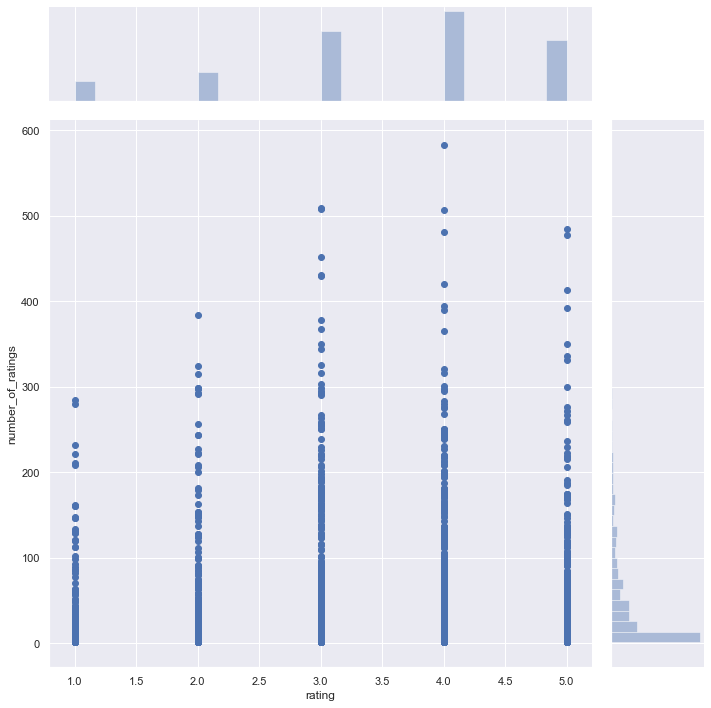

In [84]:
# plotting data about number of ratings 
df = ratings.filter(['rating','movie_id'], axis = 1)
df['number_of_ratings'] = df.groupby('movie_id')['rating'].count()
#plotting it as jointplot so we can visualize the distribution of no. of number_of_ratigns
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=df, height = 10)


In [85]:
movielens = ratings.merge(movies, on='movie_id').merge(users, on='user_id')
movielens.head()

,user_id,movie_id,rating,unix_timestamp,title,release_date,video_release_date,genre_unknown,Action,Adventure,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip_code
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,0,0,0,...,0,0,0,0,0,0,49,M,writer,55105
1,196,257,2,881251577,Men in Black (1997),04-Jul-1997,NaN,0,1,1,...,0,0,1,0,0,0,49,M,writer,55105
2,196,111,4,881251793,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,NaN,0,0,0,...,0,1,0,0,0,0,49,M,writer,55105
3,196,25,4,881251955,"Birdcage, The (1996)",08-Mar-1996,NaN,0,0,0,...,0,0,0,0,0,0,49,M,writer,55105
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,NaN,0,0,0,...,0,0,0,0,0,0,49,M,writer,55105


In [86]:
# Create filters to be used to slice the data.
occupation_filter = alt.selection_multi(fields=["occupation"])
occupation_chart = alt.Chart().mark_bar().encode(
    x="count()",
    y=alt.Y("occupation:N"),
    color=alt.condition(
        occupation_filter,
        alt.Color("occupation:N", scale=alt.Scale(scheme='category20')),
        alt.value("lightgray")),
).properties(width=300, height=300, selection=occupation_filter)

# A function that generates a histogram of filtered data.
def filtered_hist(field, label, filter):
    """Creates a layered chart of histograms.
    The first layer (light gray) contains the histogram of the full data, and the
    second contains the histogram of the filtered data.
    """
    base = alt.Chart().mark_bar().encode(
        x=alt.X(field, bin=alt.Bin(maxbins=10), title=label),
        y="count()",
    ).properties(
        width=300,
    )
    return alt.layer(
        base.transform_filter(filter),
        base.encode(color=alt.value('lightgreen'), opacity=alt.value(.7)),
    ).resolve_scale(y='independent')
#function to flatten columns 
def flatten_cols(df):
    df.columns = [' '.join(col).strip() for col in df.columns.values]
    return df
pd.DataFrame.flatten_cols = flatten_cols
#function for multipurpose use
def mask(df, key, function):
    return df[function(df[key])]
pd.DataFrame.mask = mask

This is an interactive chart.
By selecting occupation you can see curresponding values of user rating and mean rating

In [87]:
users_ratings = (
    ratings
    .groupby('user_id', as_index=False)
    .agg({'rating': ['count', 'mean']})
    .flatten_cols()
    .merge(users, on='user_id')
)
# Create a chart for the count, and one for the mean.
alt.hconcat(
    filtered_hist('rating count', '# ratings / user', occupation_filter),
    filtered_hist('rating mean', 'mean user rating', occupation_filter),
    occupation_chart,
    data=users_ratings)

alt.HConcatChart(...)

In genre category we can have same movie in multiple genres
so here is count plot of genre which is overall representation

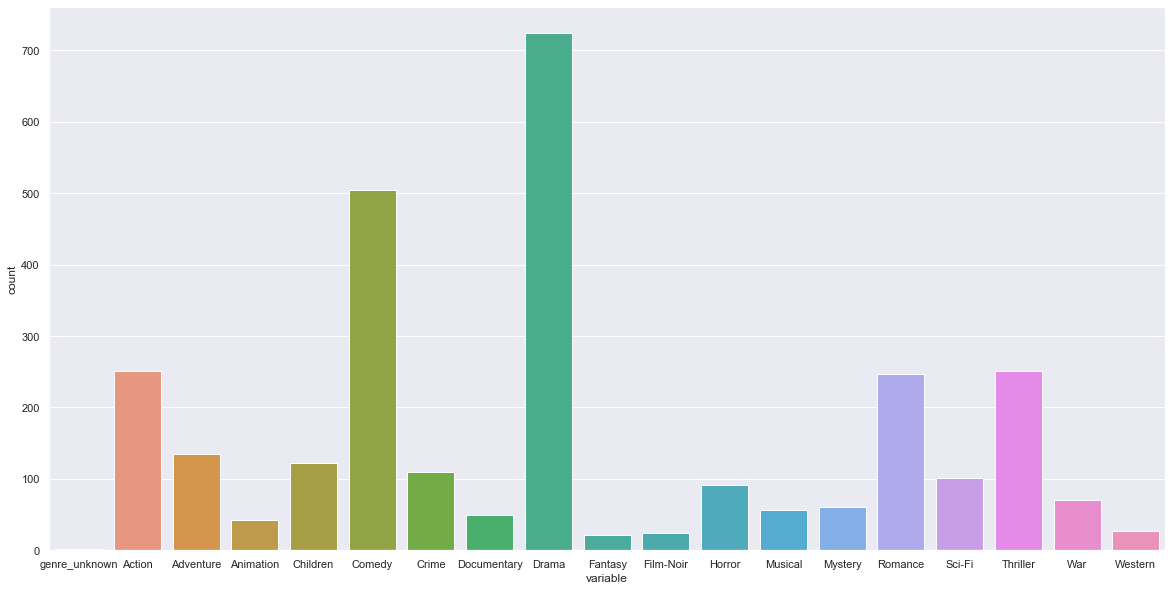

In [88]:
# Compute the number of movies to which a genre is assigned.
sns.set(rc={'figure.figsize':(20,10)})
genre_occurences = movies[genre_cols].sum().to_dict()
#here is representation of count of movies in each genre
df2 = movies.melt(value_vars=genre_cols)
df2 = df2[df2["value"] != 0]
sns.countplot(data=df2, x="variable")

## Part - 2 Item Based Collaborative Filtering

In [89]:
#start with pivotal data of rating dataset
#we are then finding similarity based on pearson correlation
#to get what is known as similarity matrix
cols = list(ratings.columns)
cols.remove('unix_timestamp')
rating = pd.merge(ratings[cols], movies[['title','movie_id']])
rating.head()

,user_id,movie_id,rating,title
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)


In [90]:
#we will create pivot table of user ratings
userRatings = rating.pivot_table(index=['user_id'],columns=['title'],values='rating')
userRatings.head()
#nan represents null values where user has not rated movie 

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [91]:
#we will now find pearson correlation matrix and use it to find column wise similarity of movies
corrMatrix = userRatings.corr()
corrMatrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),1.0,NaN,-1.000000,-0.500000,-0.500000,0.522233,NaN,-0.426401,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,1.0,NaN,NaN,NaN,NaN,NaN,-0.981981,NaN,NaN,...,NaN,NaN,NaN,-0.944911,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),-1.0,NaN,1.000000,-0.049890,0.269191,0.048973,0.266928,-0.043407,NaN,0.111111,...,NaN,-1.000000,NaN,0.158840,0.119234,0.680414,0.000000,0.707107,NaN,NaN
12 Angry Men (1957),-0.5,NaN,-0.049890,1.000000,0.666667,0.256625,0.274772,0.178848,NaN,0.457176,...,NaN,NaN,NaN,0.096546,0.068944,-0.361961,0.144338,1.000000,1.0,NaN
187 (1997),-0.5,NaN,0.269191,0.666667,1.000000,0.596644,NaN,-0.554700,NaN,1.000000,...,NaN,0.866025,NaN,0.455233,-0.500000,0.500000,0.475327,NaN,NaN,NaN


In [92]:
#for checking similarity we are using movies entered by user 4(it has low no of rated movies)
myRatings = userRatings.loc[4].dropna()
myRatings
#these are the movies rated by user 4

title
Air Force One (1997)                         5.0
Assignment, The (1997)                       5.0
Blues Brothers 2000 (1998)                   5.0
Client, The (1994)                           3.0
Conspiracy Theory (1997)                     3.0
Contact (1997)                               5.0
Cop Land (1997)                              5.0
Desperate Measures (1998)                    5.0
Event Horizon (1997)                         4.0
In & Out (1997)                              5.0
Incognito (1997)                             5.0
Indiana Jones and the Last Crusade (1989)    3.0
Liar Liar (1997)                             5.0
Lost Highway (1997)                          5.0
Mimic (1997)                                 3.0
One Flew Over the Cuckoo's Nest (1975)       4.0
Scream (1996)                                4.0
Seven (Se7en) (1995)                         4.0
Spawn (1997)                                 2.0
Star Wars (1977)                             5.0
Starship Troop

In [93]:
#we will iterate through movies rated by user 4
simCandidates = pd.Series(dtype = 'float64')
for i in range(0, len(myRatings.index)):
    #print ("Adding sims for " + myRatings.index[i] + ":-")
    #we will Retrieve similar movies to this one that user 4 rated
    sims = corrMatrix[myRatings.index[i]].dropna()
    # Now scale its similarity by how well user 4 rated this movie  and then append it
    sims = sims.map(lambda x: x * myRatings[i])
    simCandidates = simCandidates.append(sims)
    #print(simCandidates)
# now we will sort the movies that are candidates for similar movies    
simCandidates.sort_values(inplace = True, ascending = False)
print (simCandidates.head())

Man of the Year (1995)                                        5.0
'Til There Was You (1997)                                     5.0
Rising Sun (1993)                                             5.0
Dream Man (1995)                                              5.0
Horseman on the Roof, The (Hussard sur le toit, Le) (1995)    5.0
dtype: float64


In [94]:
#We'll use groupby() to add together the scores from movies that show up more than once
simCandidates.sort_values(inplace = True, ascending = False)
simCandidates.head()

Man of the Year (1995)                              5.0
Innocent Sleep, The (1995)                          5.0
Sum of Us, The (1994)                               5.0
Gold Diggers: The Secret of Bear Mountain (1995)    5.0
An Unforgettable Summer (1994)                      5.0
dtype: float64

In [95]:
#we will drop movies that are already rated by user 4
filteredSims = simCandidates.drop(myRatings.index)
filteredSims.head()

Man of the Year (1995)                              5.0
Innocent Sleep, The (1995)                          5.0
Sum of Us, The (1994)                               5.0
Gold Diggers: The Secret of Bear Mountain (1995)    5.0
An Unforgettable Summer (1994)                      5.0
dtype: float64

filteredSims contains movies similar to that of user 4.
We can also specify explicitly movies that we want to get recommendations from the matrix data.
For that we can enter new user data and then append in ratings,users list.
select user number(defined by you) to get movie recommendations

# Part - 3 Matrix Factorization

Matrix Factorization is a part of collaboration filtering
which comes under model based recommendation system approach and
use machine learning to find out recommendation.

## We have used gradient descent optimization algorithm to train our model over iterations.

In [96]:
#importing tensorflow to work
import tensorflow as tf
import collections
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from IPython import display
from mpl_toolkits.mplot3d import Axes3D

In [97]:
#starting with utility train test split function
def split_dataframe(df, holdout_fraction=0.1):
    #plits a DataFrame into training and test sets.
    test = df.sample(frac=holdout_fraction, replace=False)
    train = df[~df.index.isin(test.index)]
    return train, test

In [98]:
#we are building presentaion of rating matrix into sparse tensor
def Build_rating_sparse_tensor(ratings_df):
    indices = ratings_df[['user_id', 'movie_id']].values
    values = ratings_df['rating'].values
    return tf.SparseTensor(
      indices=indices,
      values=values,
      dense_shape=[users.shape[0], movies.shape[0]])

The model approximates the ratings matrix $A$ by a low-rank product $UV^\top$. We need a way to measure the approximation error.

In [99]:
#we will start with mean square error of observed entries only
def Sparse_mean_square_error(sparse_ratings, user_embeddings, movie_embeddings):
    #it simply multiplies U and V transpose and we have A
    predictions = tf.gather_nd(
    tf.matmul(user_embeddings, movie_embeddings, transpose_b=True),
    sparse_ratings.indices)
    loss = tf.losses.mean_squared_error(sparse_ratings.values, predictions)
    return loss

In [100]:
def build_model(ratings, embedding_dim=3, init_stddev=1.):
    # Split the ratings DataFrame into train and test.
    train_ratings, test_ratings = split_dataframe(ratings)
    # SparseTensor representation of the train and test datasets.
    A_train = Build_rating_sparse_tensor(train_ratings)
    A_test =  Build_rating_sparse_tensor(test_ratings)
    # Initialize the embeddings using a normal distribution.
    U = tf.Variable(tf.random_normal(
    [A_train.dense_shape[0], embedding_dim], stddev=init_stddev))
    V = tf.Variable(tf.random_normal(
    [A_train.dense_shape[1], embedding_dim], stddev=init_stddev))
    train_loss = Sparse_mean_square_error(A_train, U, V)
    test_loss = Sparse_mean_square_error(A_test, U, V)
    metrics = {
    'train_error': train_loss,
    'test_error': test_loss
    }
    embeddings = {
    "user_id": U,
    "movie_id": V
    }
    return CFModel(embeddings, train_loss, [metrics])

In [101]:
class CFModel(object):
    #Simple class that represents a collaborative filtering model
    def __init__(self, embedding_vars, loss, metrics=None):
        #Initializes a CFModel
        self._embedding_vars = embedding_vars
        self._loss = loss
        self._metrics = metrics
        self._embeddings = {k: None for k in embedding_vars}
        self._session = None

    def embeddings(self):
        #The embeddings dictionary.
        return self._embeddings

    def train(self, num_iterations=100, learning_rate=1.0, plot_results=True,
        optimizer=tf.train.GradientDescentOptimizer):
        #Trains the model.
        with self._loss.graph.as_default():
            opt = optimizer(learning_rate)
            train_op = opt.minimize(self._loss)
            local_init_op = tf.group(
            tf.variables_initializer(opt.variables()),
            tf.local_variables_initializer())
            if self._session is None:
                self._session = tf.Session()
            with self._session.as_default():
                self._session.run(tf.global_variables_initializer())
                self._session.run(tf.tables_initializer())
                tf.train.start_queue_runners()

        with self._session.as_default():
            local_init_op.run()
            iterations = []
            metrics = self._metrics or ({},)
            metrics_vals = [collections.defaultdict(list) for _ in self._metrics]

            # Train and append results.
            for i in range(num_iterations + 1):
                _, results = self._session.run((train_op, metrics))
                #print(results)
            if (i % 10 == 0) or i == num_iterations:
                print("\r iteration %d: " % i + ", ".join(
                      ["%s=%f" % (k, v) for r in results for k, v in r.items()]),
                      end='')
                iterations.append(i)
                for metric_val, result in zip(metrics_vals, results):
                    for k, v in result.items():
                        metric_val[k].append(v)
                        #print(matric_val[k])
            for k, v in self._embedding_vars.items():
                self._embeddings[k] = v.eval()

            if plot_results:
                # Plot the metrics.
                num_subplots = len(metrics)+1
                fig = plt.figure()
                fig.set_size_inches(num_subplots*10, 8)
                for i, metric_vals in enumerate(metrics_vals):
                    ax = fig.add_subplot(1, num_subplots, i+1)
                    for k, v in metric_vals.items():
                        ax.plot(iterations, v, label=k)
                    ax.set_xlim([1, num_iterations])
                    ax.legend()
            return results

In [102]:
# Build the CF model and train it.
model = build_model(ratings, embedding_dim=30, init_stddev=0.5)
model.train(num_iterations=1000, learning_rate=10.,plot_results = False)

 iteration 1000: train_error=0.399291, test_error=1.355371

[{'train_error': 0.39929083, 'test_error': 1.3553711}]

We got train error as 0.39 and test as 1.3 which is satisfactory implementation of Matrix Factorization

In [103]:
# this function is to find the score of two embeddings
DOT = 'dot'
COSINE = 'cosine'
def compute_scores(query_embedding, item_embeddings, measure=DOT):
    #Computes the scores of the candidates given a query.
    u = query_embedding
    V = item_embeddings
    if measure == COSINE:
        V = V / np.linalg.norm(V, axis=1, keepdims=True)
        u = u / np.linalg.norm(u)
    scores = u.dot(V.T)
    return scores

In [104]:
#to find out how similar ar movies with given movie
def movie_neighbors(model, title_substring, measure=DOT, k=6):
    # Search for movie ids that match the given substring.
    ids =  movies[movies['title'].str.contains(title_substring)].index.values
    titles = movies.iloc[ids]['title'].values
    if len(titles) == 0:
        raise ValueError("Found no movies with title %s" % title_substring)
    print("Nearest neighbors of : %s." % titles[0])
    if len(titles) > 1:
        print("[Found more than one matching movie. Other candidates: {}]".format(
        ", ".join(titles[1:])))
    movie_id = ids[0]
    scores = compute_scores(
        model.embeddings()["movie_id"][movie_id], model.embeddings()["movie_id"],
        measure)
    score_key = measure + ' score'
    df = pd.DataFrame({
        score_key: list(scores),
        'titles': movies['title']
    })
    display.display(df.sort_values([score_key], ascending=False).head(k))

In [106]:
#use name of movie and similarity factor 
#to find out how similar both movies are based on the factor(dot, cosine)
movie = 'Aladdin'
movie_neighbors(model, movie, DOT)
movie_neighbors(model, movie, COSINE)

Nearest neighbors of : Aladdin (1992).
[Found more than one matching movie. Other candidates: Aladdin and the King of Thieves (1996)]


,dot score,titles
94,8.152377,Aladdin (1992)
1521,5.828742,Trial by Jury (1994)
958,5.675453,Dazed and Confused (1993)
82,5.663062,Much Ado About Nothing (1993)
963,5.652958,"Month by the Lake, A (1995)"
166,5.316683,Private Benjamin (1980)


Nearest neighbors of : Aladdin (1992).
[Found more than one matching movie. Other candidates: Aladdin and the King of Thieves (1996)]


,cosine score,titles
94,1.000000,Aladdin (1992)
82,0.762958,Much Ado About Nothing (1993)
686,0.713057,McHale's Navy (1997)
232,0.695541,Under Siege (1992)
186,0.674167,"Godfather: Part II, The (1974)"
202,0.673366,Unforgiven (1992)


We can see the similarity or movies with what we have inputted at last